Plots ATL10 (freeboard) from ICESat-2

In [36]:
import os
import h5py
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
DATADIR = '/home/apbarret/Data/ICESat-2/ATL10/2020'
filepath = os.path.join(DATADIR, 'processed_ATL10-01_20200714063401_02890801_003_01.h5')

In [20]:
f = h5py.File(filepath, 'r')

gt2l = xr.Dataset({'freeboard': (['x'], f['gt2l']['freeboard_beam_segment']['beam_freeboard']['beam_fb_height'][:]), 
                   'geoseg_beg': (['x'], f['gt2l']['freeboard_beam_segment']['beam_freeboard']['geoseg_beg'][:]), 
                   'geoseg_end': (['x'], f['gt2l']['freeboard_beam_segment']['beam_freeboard']['geoseg_end'][:]), 
                   'latitude': (['x'], f['gt2l']['freeboard_beam_segment']['beam_freeboard']['latitude'][:]), 
                   'longitude': (['x'], f['gt2l']['freeboard_beam_segment']['beam_freeboard']['longitude'][:])},)

x = (gt2l.geoseg_beg + gt2l.geoseg_end.values) * 0.5
gt2l.coords['x'] = x.values
gt2l

In [22]:
gt2l['freeboard'] = gt2l.freeboard.where(gt2l.freeboard > 0.)

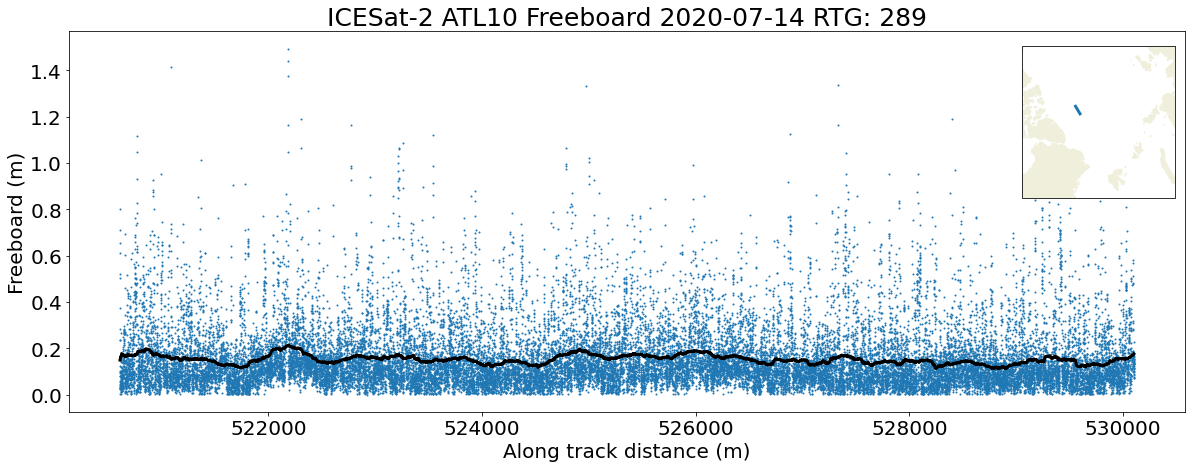

In [75]:
fig, ax = plt.subplots(figsize=(20,7))
gt2l.freeboard.plot(ax=ax, ls='', marker='o', ms=1)
gt2l.freeboard.rolling(x=1000, min_periods=500, center=True).mean().plot(ax=ax, c='k', lw=3)
ax.set_xlabel('Along track distance (m)', fontsize=20);
ax.set_ylabel('Freeboard (m)', fontsize=20)
ax.set_title('ICESat-2 ATL10 Freeboard 2020-07-14 RTG: 289', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)

subax = fig.add_axes([0.69,0.55,0.3,0.3], projection=ccrs.NorthPolarStereo())
subax.set_aspect('equal')
subax.set_extent([-180., 180., 75., 90.], ccrs.PlateCarree())
subax.add_feature(cfeature.LAND)
subax.plot(gt2l.longitude, gt2l.latitude, transform=ccrs.PlateCarree(), lw=3);

fig.savefig('freeboard_20200714_rtg289.png')

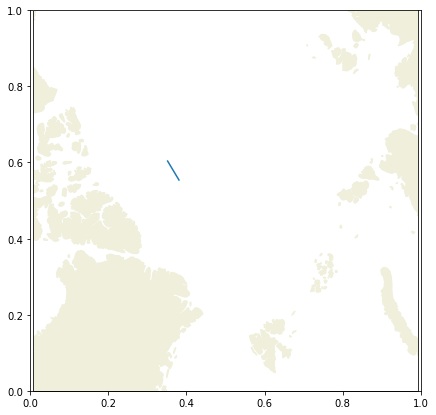

In [40]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())
ax.set_extent([-180., 180., 75., 90.], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.plot(gt2l.longitude, gt2l.latitude, transform=ccrs.PlateCarree())